# __0002 Assessment__

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import geopandas as gpd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt

# Part 1_1

In [2]:
G = nx.read_graphml('london.graphml')

In [3]:
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

## Degree centrality

In [4]:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

df = pd.DataFrame(index=G.nodes())

df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [5]:
Gad=G.copy()
sort=sorted(deg_london.items(),key=itemgetter(1),reverse=True)
sort10=[e for e,v in sort[:10]]
print(sort10)
    
Glcc=[]
Ggf=[]
    
for x in range(1,11):
    Gad.remove_nodes_from(sort10[:x])
    components=nx.connected_components(Gad)
    largest_component=max(components,key=len)
    largest_sub=Gad.subgraph(largest_component)
        
    Glcc.append(len(largest_sub.nodes)/len(Gad.nodes)*100)
    Ggf.append(nx.global_efficiency(Gad))
        
print(Glcc)
print(Ggf)

['Stratford', 'Bank and Monument', 'Baker Street', "King's Cross St. Pancras", 'West Ham', 'Canning Town', 'Waterloo', 'Green Park', 'Oxford Circus', 'Liverpool Street']
[94.75, 94.73684210526315, 94.72361809045226, 94.20654911838791, 93.68686868686868, 90.12658227848101, 90.1015228426396, 90.07633587786259, 89.79591836734694, 88.49104859335038]
[0.08891736066510689, 0.08586164448742485, 0.08203328759057034, 0.07570039409751211, 0.07302243396164704, 0.06893502024058405, 0.06721932836875794, 0.06622091057392582, 0.06536196059296152, 0.06373592086177943]


In [6]:
Gbd=G.copy()
    
Glcc=[]
Ggf=[]
    
for x in range(1,11):
    
    deg_london =nx.degree_centrality(Gbd)
    nx.set_node_attributes(Gbd,dict(deg_london),'degree')
    
    sort=sorted(deg_london.items(),key=itemgetter(1),reverse=True)
    sort1=[e for e,v in sort[:1]]
    print(sort1)
    
    Gbd.remove_nodes_from([sort1[0]])
    components=nx.connected_components(Gbd)
    largest_component=max(components,key=len)
    largest_sub=Gbd.subgraph(largest_component)
        
    Glcc.append(len(largest_sub.nodes)/len(Gbd.nodes)*100)
    Ggf.append(nx.global_efficiency(Gbd))
        
print(Glcc)
print(Ggf)

['Stratford']
['Bank and Monument']
['Baker Street']
["King's Cross St. Pancras"]
['Canning Town']
['Green Park']
["Earl's Court"]
['Waterloo']
['Oxford Circus']
['Willesden Junction']
[94.75, 94.73684210526315, 94.72361809045226, 94.20654911838791, 90.9090909090909, 90.88607594936708, 90.86294416243655, 90.83969465648855, 90.56122448979592, 87.21227621483376]
[0.08891736066510689, 0.08586164448742485, 0.08203328759057034, 0.07570039409751211, 0.07039592695635104, 0.06940235301523284, 0.0677717604548151, 0.06593580277595987, 0.06506900122239155, 0.056747518813518014]


## Betweenness centrality

In [7]:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [8]:
Gab=G.copy()
sort=sorted(bet_london_t.items(),key=itemgetter(1),reverse=True)
sort10=[e for e,v in sort[:10]]
print(sort10)
    
Glcc=[]
Ggf=[]
    
for x in range(1,11):
    Gab.remove_nodes_from(sort10[:x])
    components=nx.connected_components(Gab)
    largest_component=max(components,key=len)
    largest_sub=Gab.subgraph(largest_component)
        
    Glcc.append(len(largest_sub.nodes)/len(Gab.nodes)*100)
    Ggf.append(nx.global_efficiency(Gab))
        
print(Glcc)
print(Ggf)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo', 'Green Park', 'Euston', 'Westminster', 'Baker Street', 'Finchley Road']
[94.75, 94.73684210526315, 94.72361809045226, 93.45088161209067, 93.43434343434343, 93.41772151898734, 87.81725888324873, 87.78625954198473, 87.24489795918367, 86.70076726342711]
[0.08891736066510689, 0.08586164448742485, 0.08496349266423939, 0.07849775440713821, 0.07594226578366223, 0.07415154167648695, 0.06820564659789057, 0.06765950327361094, 0.064700058053009, 0.06313903700825897]


In [9]:
Gbb=G.copy()
    
Glcc=[]
Ggf=[]
    
for x in range(1,11):
    
    bet_london_t=nx.betweenness_centrality(Gbb, normalized=False)
    nx.set_node_attributes(Gbb,bet_london_t,'betweenness_t')
    
    sort=sorted(bet_london_t.items(),key=itemgetter(1),reverse=True)
    sort1=[e for e,v in sort[:1]]
    print(sort1)
    
    Gbb.remove_nodes_from([sort1[0]])
    components=nx.connected_components(Gbb)
    largest_component=max(components,key=len)
    largest_sub=Gbb.subgraph(largest_component)
        
    Glcc.append(len(largest_sub.nodes)/len(Gbb.nodes)*100)
    Ggf.append(nx.global_efficiency(Gbb))
        
print(Glcc)
print(Ggf)

['Stratford']
["King's Cross St. Pancras"]
['Waterloo']
['Bank and Monument']
['Canada Water']
['West Hampstead']
["Earl's Court"]
["Shepherd's Bush"]
['Euston']
['Baker Street']
[94.75, 94.73684210526315, 94.72361809045226, 94.7103274559194, 94.6969696969697, 57.46835443037974, 57.360406091370564, 49.87277353689568, 44.13265306122449, 43.47826086956522]
[0.08891736066510689, 0.08460293133575152, 0.08182895253292936, 0.07767794342812263, 0.07283234083472483, 0.053210203984026455, 0.05165629952389727, 0.0458442134055722, 0.04163076968121037, 0.0381637040943985]


## Closeness centrality

In [10]:
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [11]:
Gac=G.copy()
sort=sorted(clos_t.items(),key=itemgetter(1),reverse=True)
sort10=[e for e,v in sort[:10]]
print(sort10)
    
Glcc=[]
Ggf=[]
    
for x in range(1,11):
    Gac.remove_nodes_from(sort10[:x])
    components=nx.connected_components(Gac)
    largest_component=max(components,key=len)
    largest_sub=Gac.subgraph(largest_component)
        
    Glcc.append(len(largest_sub.nodes)/len(Gac.nodes)*100)
    Ggf.append(nx.global_efficiency(Gac))
        
print(Glcc)
print(Ggf)

['Green Park', 'Bank and Monument', "King's Cross St. Pancras", 'Westminster', 'Waterloo', 'Oxford Circus', 'Bond Street', 'Farringdon', 'Angel', 'Moorgate']
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.48849104859335]
[0.09918991960788402, 0.09487232544791133, 0.08793385149140875, 0.08737164566976727, 0.08485943799789313, 0.08278135073141742, 0.08258086417012774, 0.08260040537396239, 0.08262233108950982, 0.08166991436767818]


In [12]:
Gbc=G.copy()
    
Glcc=[]
Ggf=[]
    
for x in range(1,11):
    
    clos_t=nx.closeness_centrality(Gbc)
    nx.set_node_attributes(Gbc,clos_t,'closeness_t')
    
    sort=sorted(clos_t.items(),key=itemgetter(1),reverse=True)
    sort1=[e for e,v in sort[:1]]
    print(sort1)
    
    Gbc.remove_nodes_from([sort1[0]])
    components=nx.connected_components(Gbc)
    largest_component=max(components,key=len)
    largest_sub=Gbc.subgraph(largest_component)
        
    Glcc.append(len(largest_sub.nodes)/len(Gbc.nodes)*100)
    Ggf.append(nx.global_efficiency(Gbc))
        
print(Glcc)
print(Ggf)

['Green Park']
["King's Cross St. Pancras"]
['Waterloo']
['Bank and Monument']
['West Hampstead']
['Canada Water']
['Stratford']
["Earl's Court"]
["Shepherd's Bush"]
['Oxford Circus']
[100.0, 100.0, 100.0, 100.0, 100.0, 57.21518987341773, 57.360406091370564, 57.25190839694656, 49.744897959183675, 49.61636828644501]
[0.09918991960788402, 0.09443475025566316, 0.09181648060183005, 0.08542563066911478, 0.08054424756502003, 0.05810104159173278, 0.051883620553389555, 0.05035000093626794, 0.04439458727102797, 0.04295771061337044]


# Part 1_2

Numbers where the passenger flow is 0 are given a very small number to avoid invalid numbers after that. Differences in the selection of very small numbers may affect the value of the impact measures that appear later.

In [13]:
inv_flows={(e1,e2):round(1./(flows+0.000000000001),7)for e1,e2,flows in G.edges(data='flows')}
nx.set_edge_attributes(G,inv_flows,'inv_flows')
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483,
  'line_name': 'Jubilee',
  'flows': 12356,
  'inv_flows': 8.09e-05})

## Betweenness centrality without weight

In [14]:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [15]:
Gww=G.copy()
    
Glcc=[]
Gaspl=[]

    
for x in range(1,11):
    
    bet_london_t=nx.betweenness_centrality(Gww, normalized=False)
    nx.set_node_attributes(Gww,bet_london_t,'betweenness_t')
    
    sort=sorted(bet_london_t.items(),key=itemgetter(1),reverse=True)
    sort1=[e for e,v in sort[:1]]
    print(sort1)
    
    Gww.remove_nodes_from([sort1[0]])
    components=nx.connected_components(Gww)
    largest_component=max(components,key=len)
    largest_sub=Gww.subgraph(largest_component)
        
    Glcc.append(len(largest_sub.nodes)/len(Gww.nodes)*100)
    Gaspl.append(nx.average_shortest_path_length(largest_sub,weight='inv_flows'))
        
print(Glcc)
print(Gaspl)


['Stratford']
["King's Cross St. Pancras"]
['Waterloo']
['Bank and Monument']
['Canada Water']
['West Hampstead']
["Earl's Court"]
["Shepherd's Bush"]
['Euston']
['Baker Street']
[94.75, 94.73684210526315, 94.72361809045226, 94.7103274559194, 94.6969696969697, 57.46835443037974, 57.360406091370564, 49.87277353689568, 44.13265306122449, 43.47826086956522]
[21080258547.27704, 21135952170.43495, 21191940854.450054, 21248226950.354637, 21304812834.224667, 35164321079.10026, 35319567354.965614, 30507587650.44486, 34547654254.60422, 35154890358.51042]


## Betweenness centrality with weight

In [16]:
bet_london_w=nx.betweenness_centrality(G,weight='inv_flows',normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

df = pd.DataFrame(index=G.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))
df_sorted = df.sort_values(["betweenness_w"], ascending=False)
print(df_sorted[0:10])

                   betweenness_w
Green Park          45466.503505
Bank and Monument   40655.736170
Waterloo            32836.167065
Westminster         30146.487451
Liverpool Street    27015.442539
Stratford           26785.651639
Bond Street         23287.493459
Euston              22670.264058
Oxford Circus       21485.406388
Warren Street       20162.861623


In [17]:
Gw=G.copy()
    
Glcc=[]
Gaspl=[]

    
for x in range(1,11):
    
    bet_london_w=nx.betweenness_centrality(Gw,weight='inv_flows', normalized=False)
    nx.set_node_attributes(Gw,bet_london_w,'betweenness_w')
    
    sort=sorted(bet_london_w.items(),key=itemgetter(1),reverse=True)
    sort1=[e for e,v in sort[:1]]
    print(sort1)
    
    Gw.remove_nodes_from([sort1[0]])
    components=nx.connected_components(Gw)
    largest_component=max(components,key=len)
    largest_sub=Gw.subgraph(largest_component)
        
    Glcc.append(len(largest_sub.nodes)/len(Gw.nodes)*100)
    Gaspl.append(nx.average_shortest_path_length(largest_sub,weight='inv_flows'))

        
print(Glcc)
print(Gaspl)


['Green Park']
['Bank and Monument']
["King's Cross St. Pancras"]
['Canada Water']
['Finchley Road']
['Highbury & Islington']
['Blackhorse Road']
["Earl's Court"]
['Willesden Junction']
["Shepherd's Bush"]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 60.15228426395939, 60.05089058524173, 56.63265306122449, 49.10485933503836]
[19974937343.358406, 20024936713.643417, 20075187018.21451, 20125690150.879093, 20176448024.549347, 20227462571.483738, 33683758850.032227, 33826181031.374016, 35954506542.741905, 31140924956.37022]


In [18]:
nx.average_shortest_path_length(G,weight='inv_flows')

19925187032.41896

In [19]:
nx.global_efficiency(G)

0.1012561935972123

# Part 2

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/OwO26/0002_assessment/main/london_flows.csv')

Self-looping nodes have been removed in Excel.

In [21]:
M = pd.pivot_table(data, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
M

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [22]:
#R2
import scipy.stats

def CalcRSqaured(observed, estimated):
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

#RMSE
from math import sqrt

def CalcRMSE(observed, estimated):
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE


## Origin-constrained model (inverse power)

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/OwO26/0002_assessment/main/london_flows.csv')

In [24]:
data["pop"]= data.apply(lambda x: 0.0000000001 if x['population'] == 0 else x['population'], axis=1)

In [25]:
data["job"]=data.apply(lambda x: 0.0000000001 if x['jobs'] == 0 else x['jobs'], axis=1)

In [26]:
x_variables = ["pop", "job", "distance"]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_vars.append(f"log_{x}")

In [27]:
formula = 'flows ~ station_origin + log_job + log_distance -1'
prodSim = smf.glm(formula = formula, data=data, family=sm.families.Poisson()).fit()

In [28]:
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Mon, 02 May 2022   Deviance:                   1.8615e+06
Time:                        21:20:37   Pearson chi2:                 2.78e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [29]:
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )

In [30]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
#check this has worked
data.head()

/tmp/ipykernel_135/3256017998.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,3.250242
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,3.250242
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,3.250242
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,3.250242


In [31]:
alpha_i = prodSim.params[0:399]
gamma = prodSim.params[399]
beta = -prodSim.params[400]

In [32]:
print(alpha_i)
print(gamma)
print(beta)

station_origin[Abbey Road]          3.250242
station_origin[Acton Central]       5.016902
station_origin[Acton Town]          4.562892
station_origin[Aldgate]             3.323767
station_origin[Aldgate East]        3.457664
                                      ...   
station_origin[Wood Street]         5.242024
station_origin[Woodford]            5.160643
station_origin[Woodgrange Park]     5.254667
station_origin[Woodside Park]       4.698635
station_origin[Woolwich Arsenal]    6.905590
Length: 399, dtype: float64
0.7686156200128954
0.878119118372408


In [33]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_job"] 
                                 - beta*data["log_distance"])
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,3.250242,55.010681
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,3.250242,0.986106
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,3.250242,2.755640
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,3.250242,66.457296
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,3.250242,49.060970
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6.395262,7.096721,8.807842,599,1208,3.250242,2.639418
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,6.395262,6.739337,8.249276,599,845,3.250242,3.275120
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,6.395262,7.466228,9.048280,599,1748,3.250242,2.838948
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6.395262,6.745236,8.784484,599,850,3.250242,2.056310
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,6.395262,6.415097,8.283576,599,611,3.250242,2.476929


In [34]:
data["prodsimest1"] = round(data["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
data3 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
data3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [35]:
print(CalcRSqaured(data["flows"], data["prodsimest1"]))
CalcRMSE(data["flows"], data["prodsimest1"])

0.3882919666296714


102.857

## Origin-constrained model (negative exponential)

In [36]:
data = pd.read_csv('https://raw.githubusercontent.com/OwO26/0002_assessment/main/london_flows.csv')

In [37]:
data["pop"]= data.apply(lambda x: 0.0000000001 if x['population'] == 0 else x['population'], axis=1)

In [38]:
data["job"]=data.apply(lambda x: 0.0000000001 if x['jobs'] == 0 else x['jobs'], axis=1)

In [39]:
#take the variables and produce logarithms of them
x_variables = ["pop", "job", "distance"]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_vars.append(f"log_{x}")


formula = 'flows ~ station_origin + log_job + distance-1'
prodSim = smf.glm(formula = formula, data=data, family=sm.families.Poisson()).fit()



In [40]:
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 02 May 2022   Deviance:                   1.6477e+06
Time:                        21:22:16   Pearson chi2:                 2.40e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [41]:
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )

In [42]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
#check this has worked
data.head()

/tmp/ipykernel_135/3256017998.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,-2.914322
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,-2.914322
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,-2.914322
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,-2.914322
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,-2.914322


In [43]:
alpha_i = prodSim.params[0:399]
gamma = prodSim.params[399]
beta = -prodSim.params[400]

In [44]:
print(alpha_i)
print(gamma)
print(beta)

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 399, dtype: float64
0.7552215895697125
0.0001531661934629062


In [45]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_job"] 
                                 - beta*data["distance"])
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,-2.914322,77.685360
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,-2.914322,1.465951
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,-2.914322,4.121373
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,-2.914322,99.484532
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,-2.914322,56.125688
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6.395262,7.096721,8.807842,599,1208,-2.914322,4.141812
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,6.395262,6.739337,8.249276,599,845,-2.914322,4.901455
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,6.395262,7.466228,9.048280,599,1748,-2.914322,4.144676
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6.395262,6.745236,8.784484,599,850,-2.914322,3.252193
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,6.395262,6.415097,8.283576,599,611,-2.914322,3.759238


In [46]:
data["prodsimest1"] = round(data["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
data_o = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
data_o

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3100.0


In [47]:
print(CalcRSqaured(data["flows"], data["prodsimest1"]))
CalcRMSE(data["flows"], data["prodsimest1"])

0.46807815299511213


96.229

## Scenarios A

In [48]:
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 58772.0/2
    else:
        val = row["job"]
    return val
        
data["Dj3_destsalScenario"] = data.apply(new_job, axis =1)
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i,prodsimest1,Dj3_destsalScenario
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,-2.914322,78.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,-2.914322,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,-2.914322,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,-2.914322,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,-2.914322,56.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6.395262,7.096721,8.807842,599,1208,-2.914322,4.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,6.395262,6.739337,8.249276,599,845,-2.914322,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,6.395262,7.466228,9.048280,599,1748,-2.914322,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6.395262,6.745236,8.784484,599,850,-2.914322,3.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,6.395262,6.415097,8.283576,599,611,-2.914322,4.0,611.0


In [49]:
data["prodsimest2"] = np.exp(data["alpha_i"]+gamma*np.log(data["Dj3_destsalScenario"]) - beta*data["distance"])

data["prodsimest2"] = round(data["prodsimest2"],0)
#now we can convert the pivot table into a matrix
data4 = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)

In [50]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = data["job"]**gamma
dist_beta = np.exp(data["distance"]*-beta)
#calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [51]:
#to check everything works, recreate the original estimates
data["prodsimest3"] = data["A_i"]*data["O_i"]*Dj2_gamma*dist_beta
#round
data["prodsimest3"] = round(data["prodsimest3"])
#check
data[["prodsimest1", "prodsimest2","prodsimest3"]]

,prodsimest1,prodsimest2,prodsimest3
0,78.0,78.0,78.0
1,1.0,1.0,1.0
2,4.0,4.0,4.0
3,99.0,59.0,99.0
4,56.0,56.0,56.0
...,...,...,...
61451,99.0,99.0,99.0
61452,295.0,295.0,295.0
61453,36.0,36.0,36.0
61454,125.0,125.0,125.0


In [52]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = data["Dj3_destsalScenario"]**gamma
#calcualte the first stage of the Ai values
data["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [53]:
#to check everything works, recreate the original estimates
data["prodsimest4"] = data["A_i2"]*data["O_i"]*Dj3_gamma*dist_beta
#round
data["prodsimest4"] = round(data["prodsimest4"])

In [54]:
data50 = data.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                         aggfunc=np.sum, margins=True)
data50

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3750.0
Aldgate,NaN,NaN,1.0,NaN,38.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate East,NaN,NaN,1.0,41.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4860.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3102.0


In [55]:
CalcRSqaured(data["flows"], data["prodsimest4"])

0.4516658226245473

## Scenarios B betax1.5

In [56]:
data = pd.read_csv('https://raw.githubusercontent.com/OwO26/0002_assessment/main/london_flows.csv')

In [57]:
data["pop"]= data.apply(lambda x: 0.0000000001 if x['population'] == 0 else x['population'], axis=1)

In [58]:
data["job"]=data.apply(lambda x: 0.0000000001 if x['jobs'] == 0 else x['jobs'], axis=1)

In [59]:
#take the variables and produce logarithms of them
x_variables = ["pop", "job", "distance"]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_vars.append(f"log_{x}")


formula = 'flows ~ station_origin + log_job + distance-1'
prodSim = smf.glm(formula = formula, data=data, family=sm.families.Poisson()).fit()



In [60]:
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 02 May 2022   Deviance:                   1.6477e+06
Time:                        21:24:13   Pearson chi2:                 2.40e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [61]:
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )

In [62]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
#check this has worked
data.head()

/tmp/ipykernel_135/3256017998.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,-2.914322
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,-2.914322
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,-2.914322
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,-2.914322
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,-2.914322


In [63]:
alpha_i = prodSim.params[0:399]
gamma = prodSim.params[399]
beta = -prodSim.params[400]

In [64]:
print(alpha_i)
print(gamma)
print(beta)

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 399, dtype: float64
0.7552215895697125
0.0001531661934629062


In [65]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_job"] 
                                 - beta*data["distance"])
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,-2.914322,77.685360
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,-2.914322,1.465951
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,-2.914322,4.121373
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,-2.914322,99.484532
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,-2.914322,56.125688
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6.395262,7.096721,8.807842,599,1208,-2.914322,4.141812
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,6.395262,6.739337,8.249276,599,845,-2.914322,4.901455
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,6.395262,7.466228,9.048280,599,1748,-2.914322,4.144676
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6.395262,6.745236,8.784484,599,850,-2.914322,3.252193
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,6.395262,6.415097,8.283576,599,611,-2.914322,3.759238


In [66]:
data["prodsimest1"] = round(data["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
data3 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
data3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3100.0


In [67]:
print(CalcRSqaured(data["flows"], data["prodsimest1"]))
CalcRMSE(data["flows"], data["prodsimest1"])

0.46807815299511213


96.229

### beta x 1.5

In [68]:
betax2=beta*1.5

In [69]:
data["prodsimest2"] = np.exp(data["alpha_i"]+gamma*np.log(data['job']) - betax2*data["distance"])

data["prodsimest2"] = round(data["prodsimest2"],0)
#now we can convert the pivot table into a matrix
dataep = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
dataep

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,457.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,677.0
Acton Town,NaN,NaN,NaN,4.0,3.0,NaN,9.0,0.0,NaN,5.0,...,4.0,1.0,0.0,12.0,NaN,0.0,NaN,0.0,NaN,1722.0
Aldgate,NaN,NaN,0.0,NaN,33.0,NaN,NaN,0.0,NaN,21.0,...,0.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2055.0
Aldgate East,NaN,NaN,0.0,36.0,NaN,NaN,0.0,0.0,NaN,22.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,12.0,17.0,NaN,NaN,NaN,NaN,8.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1662.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.0
Woodside Park,NaN,NaN,0.0,5.0,5.0,NaN,0.0,NaN,NaN,11.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1017.0


In [70]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = data["job"]**gamma
dist_beta = np.exp(data["distance"]*-betax2)
#calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [71]:
#to check everything works, recreate the original estimates
data["prodsimest3"] = data["A_i"]*data["O_i"]*Dj2_gamma*dist_beta
#round
data["prodsimest3"] = round(data["prodsimest3"])

In [72]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = data["jobs"]**gamma
#calcualte the first stage of the Ai values
data["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [73]:
#to check everything works, recreate the original estimates
data["prodsimest4"] = data["A_i2"]*data["O_i"]*Dj3_gamma*dist_beta
#round
data["prodsimest4"] = round(data["prodsimest4"])

In [74]:
datax15 = data.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                         aggfunc=np.sum, margins=True)
datax15

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,8.0,7.0,NaN,20.0,0.0,NaN,10.0,...,9.0,2.0,1.0,26.0,NaN,0.0,NaN,0.0,NaN,3745.0
Aldgate,NaN,NaN,1.0,NaN,47.0,NaN,NaN,0.0,NaN,29.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2875.0
Aldgate East,NaN,NaN,1.0,51.0,NaN,NaN,0.0,0.0,NaN,30.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,36.0,50.0,NaN,NaN,NaN,NaN,22.0,...,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4865.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,1.0,16.0,15.0,NaN,0.0,NaN,NaN,32.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3089.0


In [75]:
print(CalcRSqaured(data["flows"], data["prodsimest4"]))
CalcRMSE(data["flows"], data["prodsimest4"])

0.44606752541850125


97.867

In [76]:
datax15.to_csv('0501datax10.csv')

## Scenarios B betax2

In [77]:
data = pd.read_csv('https://raw.githubusercontent.com/OwO26/0002_assessment/main/london_flows.csv')

In [78]:
data["pop"]= data.apply(lambda x: 0.0000000001 if x['population'] == 0 else x['population'], axis=1)

In [79]:
data["job"]=data.apply(lambda x: 0.0000000001 if x['jobs'] == 0 else x['jobs'], axis=1)

In [80]:
#take the variables and produce logarithms of them
x_variables = ["pop", "job", "distance"]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_vars.append(f"log_{x}")


formula = 'flows ~ station_origin + log_job + distance-1'
prodSim = smf.glm(formula = formula, data=data, family=sm.families.Poisson()).fit()



In [81]:
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 02 May 2022   Deviance:                   1.6477e+06
Time:                        21:26:11   Pearson chi2:                 2.40e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [82]:
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )

In [83]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
#check this has worked
data.head()

/tmp/ipykernel_135/3256017998.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,-2.914322
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,-2.914322
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,-2.914322
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,-2.914322
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,-2.914322


In [84]:
alpha_i = prodSim.params[0:399]
gamma = prodSim.params[399]
beta = -prodSim.params[400]

In [85]:
print(alpha_i)
print(gamma)
print(beta)

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 399, dtype: float64
0.7552215895697125
0.0001531661934629062


In [86]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_job"] 
                                 - beta*data["distance"])
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,pop,job,log_pop,log_job,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,6.395262,11.271478,9.003504,599,78549,-2.914322,77.685360
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,6.395262,6.091310,9.049012,599,442,-2.914322,1.465951
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,6.395262,6.499787,8.236275,599,665,-2.914322,4.121373
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,6.395262,10.981421,8.534348,599,58772,-2.914322,99.484532
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,6.395262,9.643939,7.709274,599,15428,-2.914322,56.125688
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6.395262,7.096721,8.807842,599,1208,-2.914322,4.141812
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,6.395262,6.739337,8.249276,599,845,-2.914322,4.901455
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,6.395262,7.466228,9.048280,599,1748,-2.914322,4.144676
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6.395262,6.745236,8.784484,599,850,-2.914322,3.252193
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,6.395262,6.415097,8.283576,599,611,-2.914322,3.759238


In [87]:
data["prodsimest1"] = round(data["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
data3 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
data3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3100.0


In [88]:
print(CalcRSqaured(data["flows"], data["prodsimest1"]))
CalcRMSE(data["flows"], data["prodsimest1"])

0.46807815299511213


96.229

### beta x 2

In [89]:
betax2=beta*2

In [90]:
data["prodsimest2"] = np.exp(data["alpha_i"]+gamma*np.log(data['job']) - betax2*data["distance"])

data["prodsimest2"] = round(data["prodsimest2"],0)
#now we can convert the pivot table into a matrix
dataep = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
dataep

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,361.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,433.0
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,6.0,0.0,NaN,1.0,...,1.0,0.0,0.0,7.0,NaN,0.0,NaN,0.0,NaN,911.0
Aldgate,NaN,NaN,0.0,NaN,30.0,NaN,NaN,0.0,NaN,16.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1545.0
Aldgate East,NaN,NaN,0.0,32.0,NaN,NaN,0.0,0.0,NaN,16.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,4.0,6.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,684.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,4.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,387.0


In [91]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = data["job"]**gamma
dist_beta = np.exp(data["distance"]*-betax2)
#calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [92]:
#to check everything works, recreate the original estimates
data["prodsimest3"] = data["A_i"]*data["O_i"]*Dj2_gamma*dist_beta
#round
data["prodsimest3"] = round(data["prodsimest3"])

In [93]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = data["jobs"]**gamma
#calcualte the first stage of the Ai values
data["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [94]:
#to check everything works, recreate the original estimates
data["prodsimest4"] = data["A_i2"]*data["O_i"]*Dj3_gamma*dist_beta
#round
data["prodsimest4"] = round(data["prodsimest4"])

In [95]:
datax2 = data.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                         aggfunc=np.sum, margins=True)
datax2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,4.0,4.0,NaN,26.0,0.0,NaN,6.0,...,5.0,1.0,0.0,30.0,NaN,0.0,NaN,0.0,NaN,3728.0
Aldgate,NaN,NaN,0.0,NaN,56.0,NaN,NaN,0.0,NaN,30.0,...,0.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2875.0
Aldgate East,NaN,NaN,0.0,61.0,NaN,NaN,0.0,0.0,NaN,31.0,...,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,26.0,40.0,NaN,NaN,NaN,NaN,14.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,0.0,11.0,10.0,NaN,0.0,NaN,NaN,28.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3087.0


In [96]:
print(CalcRSqaured(data["flows"], data["prodsimest4"]))
CalcRMSE(data["flows"], data["prodsimest4"])

0.39823009355661293


103.692

In [97]:
datax2.to_csv('dataxz15.csv')

Export and preprocess data.

## Plot

Import processed data and plot

In [98]:
plot_doc = pd.read_csv('plot_doc.csv')

In [99]:
plot_doc=plot_doc.set_index('station_destination')

In [100]:
plot_doc

,Original,Model,CW_50%,beta_x1.5,beta_x2,CW_50%_diff,beta_x1.5_diff,beta_x2_diff,in_flow,beta_x10,beta_x100,beta_x5,beta_x15,beta_x10_diff,beta_x100_diff,beta_x5_diff,beta_x15_diff
station_destination,,,,,,,,,,,,,,,,,
Abbey Road,345,392,411,491,618,66,146,273,599,3489,8703,1816,4119,3144,8358,1471,3774
Acton Central,750,359,359,373,425,-391,-377,-325,1224,334,19,557,200,-416,-731,-193,-550
Acton Town,2202,2161,2172,2487,2985,-30,285,783,3745,4254,945,5060,3015,2052,-1257,2858,813
Aldgate,7782,8549,8638,8213,7659,856,431,-123,2886,4834,7458,5395,4671,-2948,-324,-2387,-3111
Aldgate East,7932,9502,9612,9278,8757,1680,1346,825,3172,5781,10320,6190,6204,-2151,2388,-1742,-1728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood Street,404,397,397,586,881,-7,182,477,1367,4251,2987,2843,5020,3847,2583,2439,4616
Woodford,706,660,673,968,1437,-33,262,731,4868,2484,420,2478,2166,1778,-286,1772,1460
Woodgrange Park,242,160,160,194,248,-82,-48,6,530,738,763,607,702,496,521,365,460


In [101]:
G_plot = nx.read_graphml('london.graphml')

In [102]:
for node in G_plot.nodes():
    G_plot.nodes[node]['coords'] = eval(G_plot.nodes[node]['coords'])

In [103]:
G_plot.remove_nodes_from(['Nine Elms','Battersea Power Station'])

In [104]:
nx.set_node_attributes(G_plot,dict(plot_doc['Original']),'Original')
nx.set_node_attributes(G_plot,dict(plot_doc['CW_50%_diff']),'CW_50%_diff')
nx.set_node_attributes(G_plot,dict(plot_doc['beta_x1.5_diff']),'beta_x1.5_diff')
nx.set_node_attributes(G_plot,dict(plot_doc['beta_x2_diff']),'beta_x2_diff')
nx.set_node_attributes(G_plot,dict(plot_doc['CW_50%']),'CW_50%')
nx.set_node_attributes(G_plot,dict(plot_doc['beta_x1.5']),'beta_x1.5')
nx.set_node_attributes(G_plot,dict(plot_doc['beta_x2']),'beta_x2')

In [105]:
list(G_plot.nodes(data=True))

[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672),
   'Original': 5759,
   'CW_50%_diff': -1617,
   'beta_x1.5_diff': -501,
   'beta_x2_diff': 912,
   'CW_50%': 4142,
   'beta_x1.5': 5258,
   'beta_x2': 6671}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083),
   'Original': 1018,
   'CW_50%_diff': -200,
   'beta_x1.5_diff': 103,
   'beta_x2_diff': 666,
   'CW_50%': 818,
   'beta_x1.5': 1121,
   'beta_x2': 1684}),
 ('Queensbury',
  {'coords': (518811.3613368616, 189760.50737704366),
   'Original': 439,
   'CW_50%_diff': -79,
   'beta_x1.5_diff': 93,
   'beta_x2_diff': 413,
   'CW_50%': 360,
   'beta_x1.5': 532,
   'beta_x2': 852}),
 ('Canons Park',
  {'coords': (518183.29968291725, 191257.26260848),
   'Original': 526,
   'CW_50%_diff': -189,
   'beta_x1.5_diff': 4,
   'beta_x2_diff': 402,
   'CW_50%': 337,
   'beta_x1.5': 530,
   'beta_x2': 928}),
 ('Stanmore',
  {'coords': (517580.4596464033, 192537.99948098673),
   'Original': 983,
   'CW_50%_

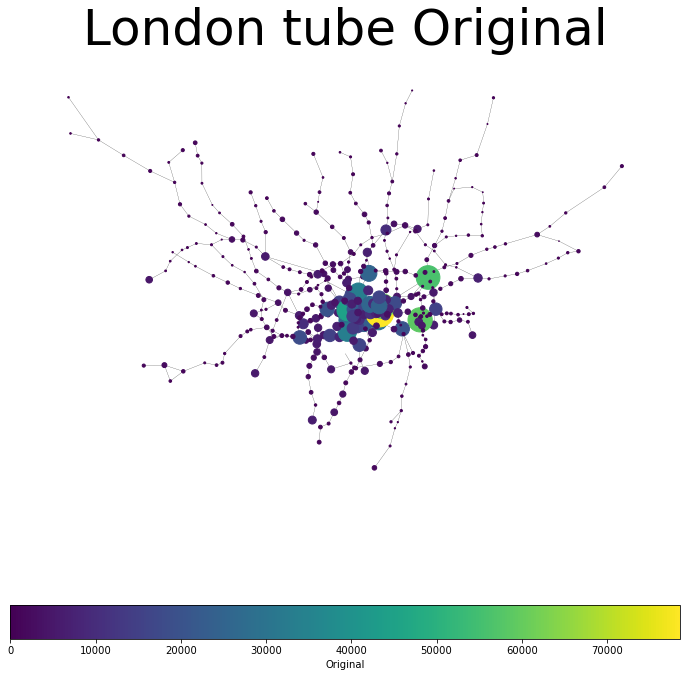

In [106]:
ori_values=[(i[1]['Original']) for i in G_plot.nodes(data=True)]

ori_color=[(i[1]['Original']) for i in G_plot.nodes(data=True)]
ori_size=[(i[1]['Original'])*0.01 for i in G_plot.nodes(data=True)]

pos = nx.get_node_attributes(G_plot, 'coords')

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G_plot,pos,arrows=False,width=0.2)

nod=nx.draw_networkx_nodes(G_plot,
        pos = pos,
        node_color= ori_color,
        node_size= ori_size)

plt.colorbar(nod,label="Original",orientation="horizontal", shrink=1)
plt.axis("off")
plt.title("London tube Original",fontsize=50)
plt.show()

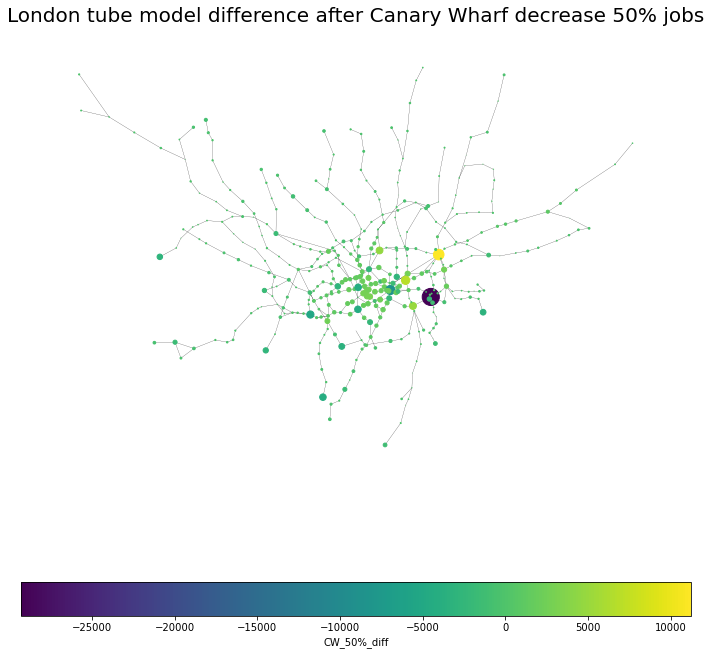

In [107]:
cw_values=[(i[1]['CW_50%_diff']) for i in G_plot.nodes(data=True)]

cw_color=[(i[1]['CW_50%_diff']) for i in G_plot.nodes(data=True)]
cw_size=[(abs(i[1]['CW_50%_diff']))*0.01 for i in G_plot.nodes(data=True)]

pos = nx.get_node_attributes(G_plot, 'coords')

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G_plot,pos,arrows=False,width=0.2)

nod=nx.draw_networkx_nodes(G_plot,
        pos = pos,
        node_color= cw_color,
        node_size= cw_size)

plt.colorbar(nod,label="CW_50%_diff",orientation="horizontal", shrink=1)
plt.axis("off")
plt.title("London tube model difference after Canary Wharf decrease 50% jobs",fontsize=20)
plt.show()

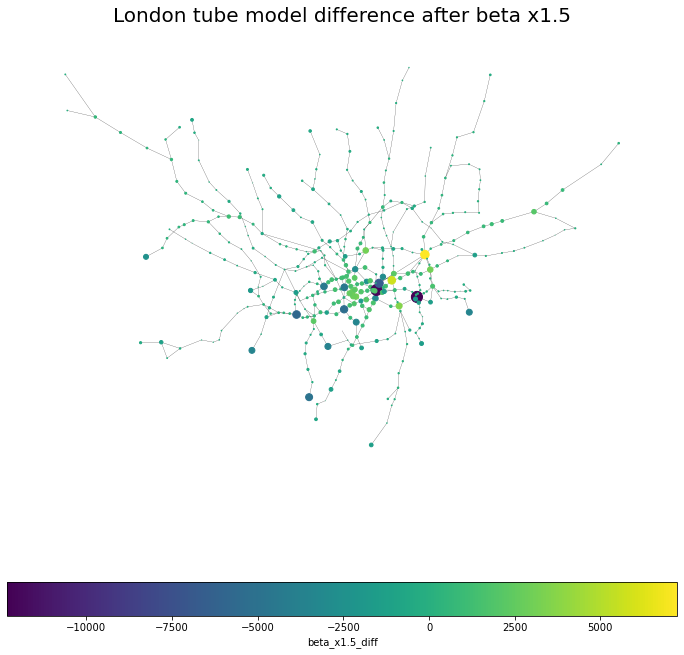

In [108]:
x15_values=[(i[1]['beta_x1.5_diff']) for i in G_plot.nodes(data=True)]

x15_color=[(i[1]['beta_x1.5_diff']) for i in G_plot.nodes(data=True)]
x15_size=[(abs(i[1]['beta_x1.5_diff']))*0.01 for i in G_plot.nodes(data=True)]

pos = nx.get_node_attributes(G_plot, 'coords')

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G_plot,pos,arrows=False,width=0.2)

nod=nx.draw_networkx_nodes(G_plot,
        pos = pos,
        node_color= x15_color,
        node_size= x15_size)

plt.colorbar(nod,label="beta_x1.5_diff",orientation="horizontal", shrink=1)
plt.axis("off")
plt.title("London tube model difference after beta x1.5",fontsize=20)
plt.show()

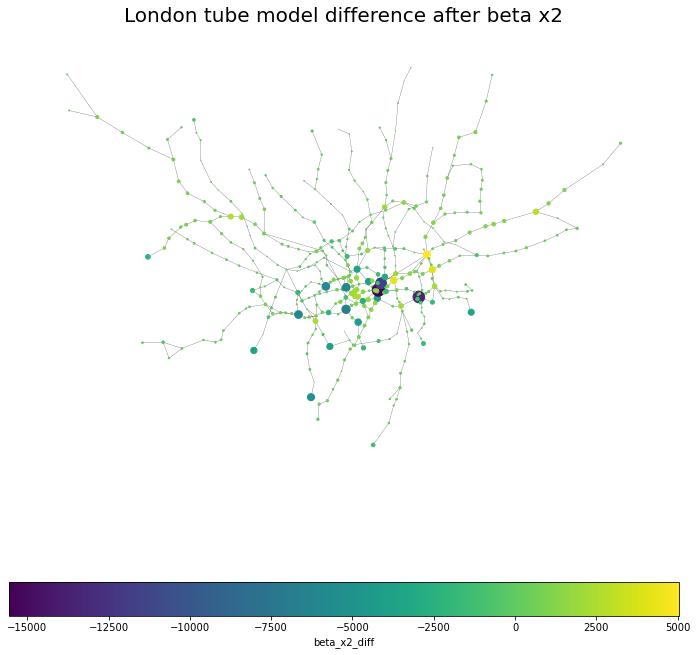

In [109]:
x2_values=[(i[1]['beta_x2_diff']) for i in G_plot.nodes(data=True)]

x2_color=[(i[1]['beta_x2_diff']) for i in G_plot.nodes(data=True)]
x2_size=[(abs(i[1]['beta_x2_diff']))*0.01 for i in G_plot.nodes(data=True)]

pos = nx.get_node_attributes(G_plot, 'coords')

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G_plot,pos,arrows=False,width=0.2)

nod=nx.draw_networkx_nodes(G_plot,
        pos = pos,
        node_color= x2_color,
        node_size= x2_size)

plt.colorbar(nod,label="beta_x2_diff",orientation="horizontal", shrink=1)
plt.axis("off")
plt.title("London tube model difference after beta x2",fontsize=20)
plt.show()

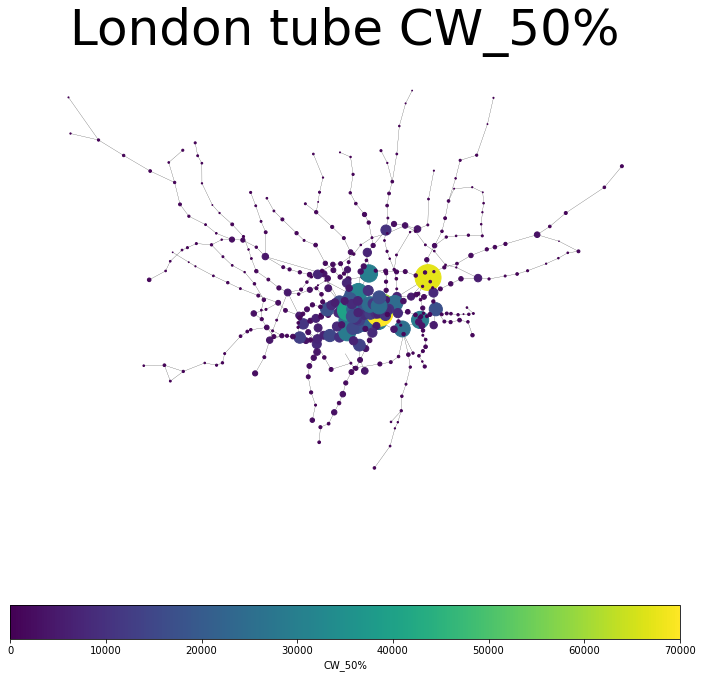

In [110]:
cw1_values=[(i[1]['CW_50%']) for i in G_plot.nodes(data=True)]

cw1_color=[(i[1]['CW_50%']) for i in G_plot.nodes(data=True)]
cw1_size=[(i[1]['CW_50%'])*0.01 for i in G_plot.nodes(data=True)]

pos = nx.get_node_attributes(G_plot, 'coords')

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G_plot,pos,arrows=False,width=0.2)

nod=nx.draw_networkx_nodes(G_plot,
        pos = pos,
        node_color= cw1_color,
        node_size= cw1_size)

plt.colorbar(nod,label="CW_50%",orientation="horizontal", shrink=1)
plt.axis("off")
plt.title("London tube CW_50%",fontsize=50)
plt.show()

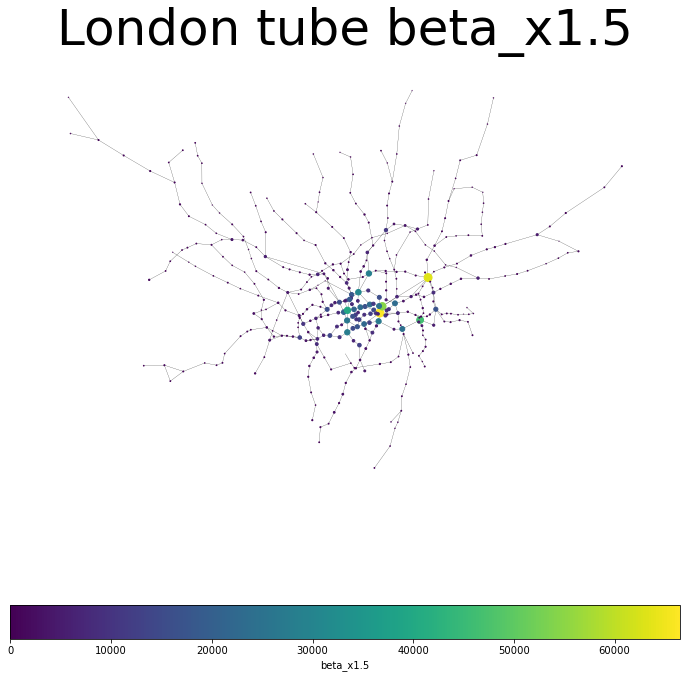

In [111]:
b15_values=[(i[1]['beta_x1.5']) for i in G_plot.nodes(data=True)]

b15_color=[(i[1]['beta_x1.5']) for i in G_plot.nodes(data=True)]
b15_size=[(i[1]['beta_x1.5'])*0.001 for i in G_plot.nodes(data=True)]

pos = nx.get_node_attributes(G_plot, 'coords')

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G_plot,pos,arrows=False,width=0.2)

nod=nx.draw_networkx_nodes(G_plot,
        pos = pos,
        node_color= b15_color,
        node_size= b15_size)

plt.colorbar(nod,label="beta_x1.5",orientation="horizontal", shrink=1)
plt.axis("off")
plt.title("London tube beta_x1.5",fontsize=50)
plt.show()

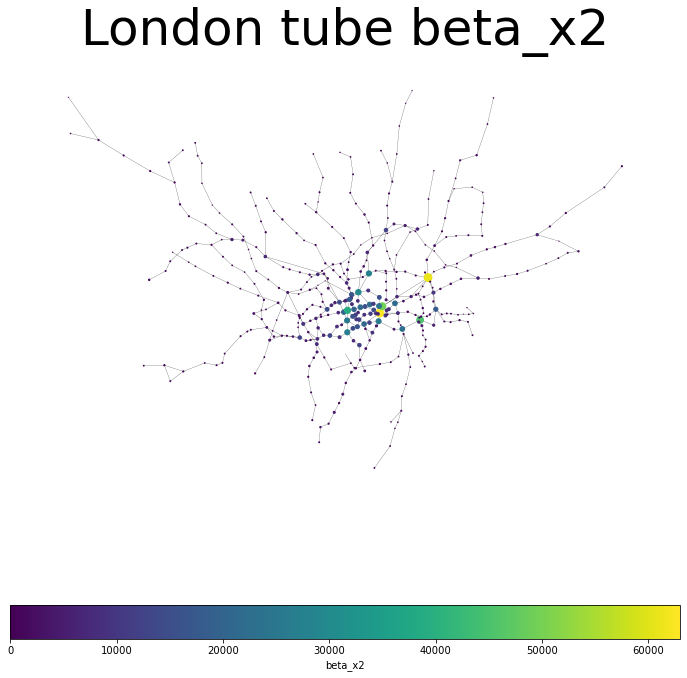

In [112]:
b2_values=[(i[1]['beta_x2']) for i in G_plot.nodes(data=True)]

b2_color=[(i[1]['beta_x2']) for i in G_plot.nodes(data=True)]
b2_size=[(i[1]['beta_x2'])*0.001 for i in G_plot.nodes(data=True)]

pos = nx.get_node_attributes(G_plot, 'coords')

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G_plot,pos,arrows=False,width=0.2)

nod=nx.draw_networkx_nodes(G_plot,
        pos = pos,
        node_color= b2_color,
        node_size= b2_size)

plt.colorbar(nod,label="beta_x2",orientation="horizontal", shrink=1)
plt.axis("off")
plt.title("London tube beta_x2",fontsize=50)
plt.show()
